In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import json
pd.set_option('display.max_rows', 1000)
%matplotlib inline

In [111]:
# Read config
with open('config.json') as json_file:
    f = json.load(json_file)
    NUMBER_OF_QUERIES = f['number_of_queries']
    REPETITIONS = f['repetitions']
    ROWS = f['rows']
    SELECTIVITIES = [f['selectivity']]
    COLS = f['cols']
    EXPS_DEFAULTS = f['experiments']
    PARTITION_SIZE = f['partition_size']
    PROGRESSIVE_INDEX_DELTAS = f['deltas']

# Algorithms and Experiments defitions
algorithms = {
    'AverageKDTree': {
        'name': 'average_kd_tree',
        'color': 'red',
        'dash': 'dot',
        'show_name': 'AvgKD',
        'type': 'full_index',
        'delta': '0.0',
        'partition_size': PARTITION_SIZE
    },
    'MedianKDTree': {
        'name': 'median_kd_tree',
        'color': 'red',
        'dash': 'solid',
        'show_name': 'MedKD',
        'type': 'full_index',
        'delta': '0.0',
        'partition_size': PARTITION_SIZE
    },
    'CrackingKDTree': {
        'name': 'cracking_kd_tree',
        'color': 'green',
        'dash': 'dot',
        'show_name': 'AKD',
        'type': 'adaptive',
        'delta': '0.0',
        'partition_size': PARTITION_SIZE
    },
    'Quasii': {
        'name': 'quasii',
        'color': 'green',
        'dash': 'solid',
        'show_name': 'Q',
        'type': 'adaptive',
        'delta': '0.0',
        'partition_size': PARTITION_SIZE
    },
    'FullScan': {
        'name': 'full_scan_cl',
        'color': 'black',
        'dash': 'dot',
        'show_name': 'FS',
        'type': 'full_index',
        'partition_size': '0',
        'delta':'0.0',
    },
    'ProgressiveIndexCostModel': {
        'name': 'progressive_index_cm',
        'color': 'purple',
        'dash': 'dot',
        'show_name': 'GPKD(.2)',
        'type': 'adaptive',
        'delta': PROGRESSIVE_INDEX_DELTAS[0],
        'partition_size': PARTITION_SIZE
    },
    'ProgressiveIndex': {
        'name': 'progressive_index',
        'color': 'purple',
        'dash': 'solid',
        'show_name': 'PKD(.2)',
        'type': 'adaptive',
        'delta': PROGRESSIVE_INDEX_DELTAS[0],
        'partition_size': PARTITION_SIZE
    }
}

for key, value in algorithms.items():
    name = value['name']
    delta = value['delta']
    partition_size = value['partition_size']
    algorithms[key]['alg_id'] = f"{name}-{delta}-{partition_size}"
    
# Synthetic Experiments
experiments = {}

for i in [2, 4, 8, 16]:
    temp = {
        f'Uniform{i}': {
            "name": f"Unif({i})",
            'name-in-file': 'uniform',
            'n_rows': ROWS,
            'n_queries': NUMBER_OF_QUERIES,
            'n_cols': f'{i}',
            'sel': '0.01',
        },
        f'Skewed{i}': {
            "name": f"Skewed({i})",
            'name-in-file': 'skewed',
            'n_rows': ROWS,
            'n_queries': NUMBER_OF_QUERIES,
            'n_cols': f'{i}',
            'sel': '0.01',
        },
        f'Sequential{i}': {
            "name": f"Seq ({i})",
            'name-in-file': 'sequential',
            'n_rows': '50000000',
            'n_queries': NUMBER_OF_QUERIES,
            'n_cols': f'{i}',
            'sel': '0.000001',
        },
        f'Periodic{i}': {
            "name": f"Prdc({i})",
            'name-in-file': 'periodic',
            'n_rows': ROWS,
            'n_queries': NUMBER_OF_QUERIES,
            'n_cols': f'{i}',
            'sel': '0.01',
        },
        f'ZoomIn{i}': {
            "name": f"Zoom({i})",
            'name-in-file': 'zoom_in',
            'n_rows': ROWS,
            'n_queries': NUMBER_OF_QUERIES,
            'n_cols': f'{i}',
            'sel': '0.01',
        },
        f'SequentialZoomIn{i}': {
            "name": f"SeqZoom({i})",
            'name-in-file': 'sequential_zoom_in',
            'n_rows': ROWS,
            'n_queries': NUMBER_OF_QUERIES,
            'n_cols': f'{i}',
            'sel': '0.01',
        },
        f'AlternatingZoomIn{i}': {
            "name": f"AltZoom({i})",
            'name-in-file': 'alternating_zoom_in',
            'n_rows': ROWS,
            'n_queries': NUMBER_OF_QUERIES,
            'n_cols': f'{i}',
            'sel': '0.01',
        },
        f'Shifting{i}': {
            "name": f"Shift({i})",
            'name-in-file': '',
            'n_rows': ROWS,
            'n_queries': NUMBER_OF_QUERIES,
            'n_cols': f'{i}',
            'sel': '0.01',
        }
    }
    experiments = {**experiments, **temp}
    
for key, value in experiments.items():
    name = value['name-in-file']
    rows = value['n_rows']
    n_queries = value['n_queries']
    cols = value['n_cols']
    sel = value['sel']
    experiments[key]['exp_id'] = f"{name}-{rows}-{n_queries}-{cols}-{sel}"
    
# Real World Experiments
temp = {
    'Power': {
        'name': 'Power',
        'name-in-file': 'power',
        'sel': '0.0',
        'n_rows': '10000000',
        'n_queries': '3000',
        'base_folder': 'results'
    },
    'Skyserver': {
        'name': 'Skyserver',
        'name-in-file': 'skyserver',
        'n_rows': '0',
        'n_queries': '0',
        'sel': '0.0',
        'base_folder': 'results'
    },
    'Genomics Mixed': {
        'name': f'Genomics',
        'name-in-file': 'genomics_query_8',
        'n_rows': '10000000',
        'n_queries': '100',
        'sel': '0.0',
        'base_folder': 'results'
    }
}

for key, value in temp.items():
    name = value['name-in-file']
    rows = value['n_rows']
    n_queries = value['n_queries']
    sel = value['sel']
    temp[key]['exp_id'] = f"{name}-{rows}-{n_queries}-{sel}"

experiments = {**experiments, **temp}

In [112]:
# Input/Output
def read(alg, exp):
    if exp.startswith('Shifting'):
        n_queries_per_run = 10
        uni = read(alg, 'Uniform' + experiments[exp]['n_cols'])
        n_runs = int(len(uni)/n_queries_per_run) - 1
        df_final = uni.head(n_queries_per_run)
        for _ in range(int(n_runs)):
            temp = uni.head(n_queries_per_run).copy()
            df_final = df_final.append(temp, ignore_index=True)
    else:
        df = pd.read_csv(f"results/{algorithms[alg]['alg_id']}-{experiments[exp]['exp_id']}.csv")
        repetitions = df['repetition'].max() + 1
        step = int(len(df.index)/repetitions)
        df_final = df[:step].copy().reset_index()
        for rep in range(1, repetitions):
            df_final += df[step * (rep) : step * (rep + 1)].copy().reset_index()

        df_final = df_final/repetitions
    
    if 'index_search_time' not in df_final:
        df_final['index_search_time'] = 0.0
    if 'tuples_scanned' not in df_final:
        df_final['tuples_scanned'] = 0.0
    if 'number_of_nodes' not in df_final:
        df_final['number_of_nodes'] = 0.0
    df_final['query_time'] = df_final['initialization_time'] + df_final['index_search_time'] + df_final['scan_time'] + df_final['adaptation_time']
    df_final['query_time_cumsum'] = df_final['query_time'].cumsum()
    return df_final

                     
def read_multiple(algs, exp):
    ''' Reads multiple algorithms in an experiment, return three arrays: dfs, colors, names
    '''
    dfs = []
    colors = []
    names = []
    dashes = []
    for alg in algs:
        dfs.append(read(alg, exp))
        names.append(algorithms[alg]['show_name'])
        colors.append(algorithms[alg]['color'])
        dashes.append(algorithms[alg]['dash'])
    
    return dfs, colors, dashes, names,

                     
def save_figure(fig, fig_name):
    fig.write_image(f"figures/{fig_name}", width=1024, height=768)
                     
def save_table(table, table_name):
    with open(f"tables/{table_name}", 'w') as f:
        f.write(table)

In [113]:
# Helper methods
def get_first_query(df):
    return df['query_time'].iloc[0]

def get_payoff(df, baseline):
    p = [i for i, x in enumerate(df['query_time_cumsum'] - (baseline['query_time_cumsum'])) if x > 0]
    if len(p) == 0:
        return len(df)
    return p[-1]

def get_convergence(df, df_type=''):
    if df_type == 'full_index':
        return 0
    c = [i for i, x in enumerate(df['adaptation_time']) if x != 0.0]
    if(len(c) == 0):
        return len(c)
    else:
        return c[-1]

def get_robustness(df, df_type=''):
    if df_type == 'full_index':
        return 0
    return np.var(df['query_time'][:min(50, get_convergence(df, df_type))])

def get_total_time(df, lower=0, upper=-1):
    return df['query_time'][lower:upper].sum()

In [185]:
# Figures

delta_cols = [2, 4, 5, 6, 7, 8]
delta_markers = ['circle', 'square', 'x', 'star', 'triangle-up', 'diamond']

def create_figure(data=[]):
    fig = go.Figure(
        data=data,
        layout=go.Layout(
#             width=1500,
            plot_bgcolor='rgba(0,0,0,0)',
            font=dict(
                size=42
            ),
            yaxis=dict(
                showline=True,
                linewidth=2,
                linecolor='black',
                showgrid=True,
                gridwidth=1,
                gridcolor='lightgrey',
                zeroline=False,
                zerolinecolor='rgba(0, 0, 0, 0)',
                ticks="inside",
                ticklen=5
            ),
            xaxis=dict(
                showline=True,
                linewidth=2,
                linecolor='black',
                ticks='inside',
                zeroline=True,
                ticklen=5
            ),
            legend=dict(
                font=dict(
                    size=30,
                    color="black"
                )
            )
        )
    )
    return fig

def line(exp, algs, attr, limit=2000):
    dfs, colors, dashes, names = read_multiple(algs, exp)
    fig = create_figure()
    
    lines = []
    
    biggest = 0
    
    for i, df in enumerate(dfs):
        per_query_times = np.array(df[attr][:limit])
        if biggest < np.max(per_query_times):
            biggest = np.max(per_query_times)
        lines.append(
            go.Scatter(
                name=names[i],
                x=list(range(len(per_query_times))),
                y=per_query_times,
                marker_color=colors[i],
                mode='lines',
                line=dict(width=4, dash=dashes[i])
            )
        )
    
    fig.add_traces(data=lines)
    fig.update_layout(showlegend=True, yaxis_title=attr)
    return fig

def workload_selectivity(exp):
    fig = create_figure()
    df = read('FullScan', exp)
    sel = ((df['tuples_scanned']/df['scan_overhead'])/df['tuples_scanned']) * 100
    
    fig.add_traces(
        data=go.Scatter(
            name='selectivity',
            x=list(range(len(sel))),
            y=sel,
            mode='lines',
            line=dict(width=4)
        )
    )
    fig.update_layout(showlegend=True, yaxis_title='Selectivity (%)')
    return fig


def per_query(exp, algs, limit=1000):
    dfs, colors, dashes, names = read_multiple(algs, exp)
    fig = create_figure()
    
    lines = []
    
    biggest = 0
    
    for i, df in enumerate(dfs):
        alg = algs[i]
        per_query_times = np.array(df['query_time'][:limit]) * 1000
        if biggest < np.max(per_query_times):
            biggest = np.max(per_query_times)
        lines.append(
            go.Scatter(
                name=names[i],
                x=list(range(len(per_query_times))),
                y=per_query_times,
                marker_color=colors[i],
                mode='lines',
                line=dict(width=6, dash=dashes[i])
            )
        )
        
    fig.add_traces(data=lines)
    fig.update_layout(showlegend=True, yaxis_title='Time (milliseconds)')
    fig.update_layout(legend_orientation="h", legend=dict(x=.25, y=1.2))
    fig.update_yaxes(type="log")
    return fig

def cummulative(exp, algs, limit=5000):
    dfs, colors, dashes, names = read_multiple(algs, exp)
    fig = create_figure()
    
    lines = []
    
    biggest = 0
    
    for i, df in enumerate(dfs):
        alg = algs[i]
        per_query_times = np.array(df['query_time_cumsum'][:limit])
        lines.append(
            go.Scatter(
                name=names[i],
                x=list(range(len(per_query_times))),
                y=per_query_times,
                marker_color=colors[i],
                mode='lines',
                line=dict(width=6, dash=dashes[i])
            )
        )
    
    fig.add_traces(data=lines)
    fig.update_layout(legend_orientation="h", legend=dict(x=.25, y=1.2))
    fig.update_layout(showlegend=True, yaxis_title='Time (Seconds)')
    return fig

def number_of_nodes(exp, algs, limit=5000):
    dfs, colors, dashes, names = read_multiple(algs, exp)
    fig = create_figure()
    
    lines = []
    
    biggest = 0
    
    for i, df in enumerate(dfs):
        per_query_times = np.array(df['number_of_nodes'][:limit])
        if biggest < np.max(per_query_times):
            biggest = np.max(per_query_times)
        lines.append(
            go.Scatter(
                name=names[i],
                x=list(range(len(per_query_times))),
                y=per_query_times,
                marker_color=colors[i],
                mode='lines',
                line=dict(width=6, dash=dashes[i])
            )
        )
    
    fig.add_traces(data=lines)
    fig.update_layout(legend_orientation="h", legend=dict(x=.25, y=1.2))
    fig.update_layout(showlegend=True, yaxis_title='# Nodes')
    return fig

def tuples_scanned(exp, algs, limit=5000):
    dfs, colors, dashes, names = read_multiple(algs, exp)
    fig = create_figure()
    
    lines = []
    
    
    for i, df in enumerate(dfs):
        per_query_times = np.array(df['tuples_scanned'][:limit])
        lines.append(
            go.Scatter(
                name=names[i],
                x=list(range(len(per_query_times))),
                y=per_query_times,
                marker_color=colors[i],
                mode='lines',
                line=dict(width=6, dash=dashes[i])
            )
        )
    
    fig.add_traces(data=lines)
    fig.update_layout(legend_orientation="h", legend=dict(x=.25, y=1.2))
    fig.update_layout(showlegend=True, yaxis_title='Tuples Scanned')
    return fig

def break_down(exp, algs, limit):
    dfs, _, _, names = read_multiple(algs, exp)
    initializations = np.array([x['initialization_time'][:limit].sum() for x in dfs])
    adaptation = np.array([x['adaptation_time'][:limit].sum() for x in dfs])
    search = np.array([x['index_search_time'][:limit].sum() for x in dfs])
    scan = np.array([x['scan_time'][:limit].sum() for x in dfs])
    
#     fig = create_figure(data=[
#         go.Bar(name='Initialization', x=names, y=initializations, marker_color='rgb(176, 201, 146)'),
#         go.Bar(name='Adaptation', x=names, y=adaptation, marker_color='rgb(195, 114, 28)'),
#         go.Bar(name='Index Search', x=names, y=search, marker_color='rgb(197, 255, 114)'),
#         go.Bar(name='Scan', x=names, y=scan, marker_color='rgb(237, 218, 123)'),
#     ])

    scan_color = '#AB63FA'
    index_search_color = '#03CC96'
    adaptation_color = '#EF553B'
    initialization_color = '#636EFA'

    data = [
        go.Bar(name='Initialization', x=names, y=initializations, width=0.5, marker_color=initialization_color, showlegend=False),
        go.Bar(name='Adaptation', x=names, y=adaptation, width=0.5, marker_color=adaptation_color, showlegend=False),
        go.Bar(name='Index Search', x=names, y=search, width=0.5, marker_color=index_search_color,showlegend=False),
        go.Bar(name='Scan', x=names, y=scan, width=0.5, marker_color=scan_color,showlegend=False),
    ]
    
    data.append(
        go.Scatter(
            name='Initialization',
            x=[None],
            y=[None],
            mode='markers',
            marker_color=initialization_color,
            marker=dict(
                size=40,
                symbol='square'
            ),
        )
    )
    
    data.append(
        go.Scatter(
            name='Adaptation',
            x=[None],
            y=[None],
            mode='markers',
            marker_color=adaptation_color,
            marker=dict(
                size=40,
                symbol='square'
            ),
        )
    )
    
    data.append(
        go.Scatter(
            name='Index Search',
            x=[None],
            y=[None],
            mode='markers',
            marker_color=index_search_color,
            marker=dict(
                size=40,
                symbol='square'
            ),
        )
    )
    
    data.append(
        go.Scatter(
            name='Scan',
            x=[None],
            y=[None],
            mode='markers',
            marker_color=scan_color,
            marker=dict(
                size=40,
                symbol='square'
            ),
        )
    )

    fig = create_figure(data=data)
    
    # Change the bar mode
    fig.update_layout(barmode='stack')
    fig.update_layout(legend_orientation="h", legend=dict(x=.25, y=1.2))
    fig.update_layout(yaxis_title='Time (seconds)')
    return fig

In [191]:
# Latex Tables

def pandas_to_latex(df, highlight='min', ignore_last=False, float_format="%.2f"):
    mins = []
    maxs = []
    for i in range(len(df)):
        row = df.iloc[i]
        c_min = float('inf')
        c_max = -float('inf')
        if ignore_last:
            length = len(row) - 1
        else:
            length = len(row)
        for j in range(length):
            if row[j] == '-' or row[j] == '*':
                continue
            if c_min > float(row[j]):
                c_min = float(row[j])
            if c_max < float(row[j]):
                c_max = float(row[j])
        mins.append(c_min)
        maxs.append(c_max)
    
    for i in range(len(df)):
        row = df.iloc[i]
        for j in range(len(row)):
            if row[j] == '-' or row[j] == '*':
                continue
            if highlight == 'min':
                if float(row[j]) == mins[i]:
                    row[j] = "\cellcolor{green!25}" + (float_format % float(row[j]))
                else:
                    row[j] = float_format % float(row[j])
            if highlight == 'max':
                if float(row[j]) == maxs[i]:
                    row[j] = "\cellcolor{green!25}" + (float_format % float(row[j]))
                else:
                    row[j] = float_format % float(row[j])
    
    return df.to_latex(multicolumn=True, multirow=True, escape=False)

def metrics(exps, algs):
    '''
    ||||||||||||Algorithm 1| Algorithm 2|...
    First Query|   1.11.   |     15.    |...
    ...
    '''
    data = {}

    # create indexes
    index_exp = []
    index_metric = []
    
    
    metrics = ['First Query', 'PayOff', 'Convergence', 'Robustness', 'Time', 'Avg Query Time']

    
    for exp in exps:
        dfs, _, _, names = read_multiple(algs, exp)
        
        # initialize the data dict with empty arrays for each algorithm
        for name in names:
            if name not in data:
                data[name] = []

        baseline = read('FullScan', exp)

        index_exp += [experiments[exp]['name']] * len(metrics)
        index_metric += metrics
        
        for df, name, alg in zip(dfs, names, algs):
            data[name].append('%.2f' % get_first_query(df))
            po = get_payoff(df, baseline)
            if po == len(df):
                data[name].append('-')
            else:
                data[name].append('%.2f' % get_total_time(df, upper=po))
            conv = get_convergence(df, algorithms[alg]['type'])
            if conv == 0:
                data[name].append('-')
            elif conv >= len(df)-1:
                data[name].append('*')
            else:
                data[name].append('%.2f' % get_total_time(df, upper= conv))
            
            robust = get_robustness(df, algorithms[alg]['type'])
            if robust == 0:
                data[name].append('-') 
            else:
                data[name].append('%.E' % robust)
            
            data[name].append('%.2f' %get_total_time(df))
            data[name].append((get_total_time(df)/len(df)))

    index = [index_exp, index_metric]
    df = pd.DataFrame(data, index=index)

    return df
    
    latex = df.to_latex(multicolumn=True, multirow=True)

    for exp in exps:
        latex = latex.replace(exp, "\\rotatebox[origin=c]{90}{%s}" % exp)
    return latex

In [192]:
exps = ['Uniform8', 'Skewed8', 'ZoomIn8', 'Periodic8', 'SequentialZoomIn8', 'AlternatingZoomIn8', 'Shifting8', 'Sequential2', 'Power', 'Genomics Mixed', 'Skyserver']
m = metrics(exps, [
        'MedianKDTree',
        'AverageKDTree',
        'Quasii',
        'CrackingKDTree',
        'ProgressiveIndex',
        'ProgressiveIndexCostModel',
        'FullScan',
])
m

MedKD        AvgKD            Q          AKD  \
Unif(8)    First Query           20.20        12.46         5.11         3.07   
           PayOff                22.19        13.57        11.12         6.83   
           Convergence               -            -            *            *   
           Robustness                -            -        6E-01        2E-01   
           Time                 109.69       101.41        95.59        74.27   
           Avg Query Time     0.109692     0.101411    0.0955867    0.0742668   
Skewed(8)  First Query           20.23        12.48         6.25         3.49   
           PayOff                23.67        14.42         9.90         5.44   
           Convergence               -            -            *            *   
           Robustness                -            -        8E-01        2E-01   
           Time                 147.63       138.33       107.57        43.06   
           Avg Query Time     0.147626     0.138328     0.107573    0.0430597   
Zoom(8)    First Query           20.28        12.68         6.13         3.24   
           PayOff                31.25        18.54         6.19         3.26   
           Convergence               -            -            *            *   
           Robustness                -            -        7E-01        2E-01   
           Time                  51.99        40.93        11.36         7.13   
           Avg Query Time    0.0519853    0.0409315    0.0113554   0.00713358   
Prdc(8)    First Query           20.17        12.42         6.99         6.94   
           PayOff                22.00        13.47         7.08         7.09   
           Convergence               -            -            *       175.56   
           Robustness                -            -        1E+00        9E-01   
           Time                  85.79        73.61        61.90       229.92   
           Avg Query Time    0.0857881    0.0736094    0.0619041     0.229919   
SeqZoom(8) First Query           19.98        12.42         5.23         2.90   
           PayOff                21.22        13.20         5.27         2.91   
           Convergence               -            -            *            *   
           Robustness                -            -        5E-01        2E-01   
           Time                  31.04        24.22         8.18         4.45   
           Avg Query Time    0.0276163    0.0215457   0.00727444   0.00396109   
AltZoom(8) First Query           20.18        12.43         6.98         6.93   
           PayOff                21.53        13.15         8.12         7.57   
           Convergence               -            -            *            *   
           Robustness                -            -        1E+00        9E-01   
           Time                  44.05        34.19        18.88        22.41   
           Avg Query Time    0.0440496    0.0341938    0.0188849    0.0224121   
Shift(8)   First Query           20.20        12.46         5.11         3.07   
           PayOff              2094.98      1319.28      1085.27        26.34   
           Convergence               -            -            *            *   
           Robustness                -            -        2E+00        9E-01   
           Time                2094.98      1319.28      1085.27       775.50   
           Avg Query Time      2.09498      1.31928      1.08527     0.775504   
Seq (2)    First Query           15.88         8.30         4.01         0.68   
           PayOff                15.89         8.30         4.07        51.17   
           Convergence               -            -            *            *   
           Robustness                -            -        3E-01        3E-03   
           Time                  15.90         8.32         6.05       102.94   
           Avg Query Time    0.0159195   0.00832768   0.00605131     0.103048   
Power      First Query            1.52         0.83         0.33

# First Query Analysis

In [148]:
idx = pd.IndexSlice
a = m.loc[idx[:, 'First Query'], :]
a = a.reset_index(level=1, drop=True)
print(pandas_to_latex(a, 'min', ignore_last=True))
a

\begin{tabular}{llllllll}
\toprule
{} &  MedKD &  AvgKD &     Q &   AKD &                   PKD(.2) &                  GPKD(.2) &    FS \\
\midrule
Unif(8)    &  20.20 &  12.46 &  5.11 &  3.07 &  \cellcolor{green!25}1.36 &  \cellcolor{green!25}1.36 &  0.91 \\
Skewed(8)  &  20.23 &  12.48 &  6.25 &  3.49 &  \cellcolor{green!25}1.26 &  \cellcolor{green!25}1.26 &  0.82 \\
Zoom(8)    &  20.28 &  12.68 &  6.13 &  3.24 &                      1.32 &  \cellcolor{green!25}1.31 &  0.84 \\
Prdc(8)    &  20.17 &  12.42 &  6.99 &  6.94 &  \cellcolor{green!25}0.99 &                      1.00 &  0.60 \\
SeqZoom(8) &  19.98 &  12.42 &  5.23 &  2.90 &                      1.42 &  \cellcolor{green!25}1.41 &  0.93 \\
AltZoom(8) &  20.18 &  12.43 &  6.98 &  6.93 &  \cellcolor{green!25}0.99 &                      1.00 &  0.60 \\
Shift(8)   &  20.20 &  12.46 &  5.11 &  3.07 &  \cellcolor{green!25}1.36 &  \cellcolor{green!25}1.36 &  0.91 \\
Seq (2)    &  15.88 &   8.30 &  4.01 &  0.68 &  \cellcolor{green!25}

,MedKD,AvgKD,Q,AKD,PKD(.2),GPKD(.2),FS
Unif(8),20.20,12.46,5.11,3.07,\cellcolor{green!25}1.36,\cellcolor{green!25}1.36,0.91
Skewed(8),20.23,12.48,6.25,3.49,\cellcolor{green!25}1.26,\cellcolor{green!25}1.26,0.82
Zoom(8),20.28,12.68,6.13,3.24,1.32,\cellcolor{green!25}1.31,0.84
Prdc(8),20.17,12.42,6.99,6.94,\cellcolor{green!25}0.99,1.00,0.60
SeqZoom(8),19.98,12.42,5.23,2.90,1.42,\cellcolor{green!25}1.41,0.93
AltZoom(8),20.18,12.43,6.98,6.93,\cellcolor{green!25}0.99,1.00,0.60
Shift(8),20.20,12.46,5.11,3.07,\cellcolor{green!25}1.36,\cellcolor{green!25}1.36,0.91
Seq (2),15.88,8.30,4.01,0.68,\cellcolor{green!25}0.26,\cellcolor{green!25}0.26,0.19
Power,1.52,0.83,0.33,0.23,\cellcolor{green!25}0.08,\cellcolor{green!25}0.08,0.06
Genomics,2.58,2.62,1.25,0.99,\cellcolor{green!25}0.27,\cellcolor{green!25}0.27,0.03


# Payoff Analysis

In [149]:
idx = pd.IndexSlice
a = m[['AvgKD', 'MedKD', 'Q', 'AKD', 'PKD(.2)', 'GPKD(.2)']].loc[idx[:, 'PayOff'], :]
a = a.reset_index(level=1, drop=True)
print(pandas_to_latex(a, 'min', ignore_last=False))
a

\begin{tabular}{lllllll}
\toprule
{} &    AvgKD &    MedKD &                         Q &                        AKD &                   PKD(.2) & GPKD(.2) \\
\midrule
Unif(8)    &    13.57 &    22.19 &                     11.12 &   \cellcolor{green!25}6.83 &                     31.41 &    22.88 \\
Skewed(8)  &    14.42 &    23.67 &                      9.90 &   \cellcolor{green!25}5.44 &                     36.06 &    28.06 \\
Zoom(8)    &    18.54 &    31.25 &                      6.19 &   \cellcolor{green!25}3.26 &                     39.50 &    30.19 \\
Prdc(8)    &    13.47 &    22.00 &  \cellcolor{green!25}7.08 &                       7.09 &                     29.14 &    22.53 \\
SeqZoom(8) &    13.20 &    21.22 &                      5.27 &   \cellcolor{green!25}2.91 &                     32.00 &    24.39 \\
AltZoom(8) &    13.15 &    21.53 &                      8.12 &   \cellcolor{green!25}7.57 &                     19.15 &    26.46 \\
Shift(8)   &  1319.28 &  2094.98 &       

,AvgKD,MedKD,Q,AKD,PKD(.2),GPKD(.2)
Unif(8),13.57,22.19,11.12,\cellcolor{green!25}6.83,31.41,22.88
Skewed(8),14.42,23.67,9.90,\cellcolor{green!25}5.44,36.06,28.06
Zoom(8),18.54,31.25,6.19,\cellcolor{green!25}3.26,39.50,30.19
Prdc(8),13.47,22.00,\cellcolor{green!25}7.08,7.09,29.14,22.53
SeqZoom(8),13.20,21.22,5.27,\cellcolor{green!25}2.91,32.00,24.39
AltZoom(8),13.15,21.53,8.12,\cellcolor{green!25}7.57,19.15,26.46
Shift(8),1319.28,2094.98,1085.27,\cellcolor{green!25}26.34,1152.43,1263.61
Seq (2),8.30,15.89,4.07,51.17,\cellcolor{green!25}1.93,7.62
Power,0.96,1.79,0.81,\cellcolor{green!25}0.41,1.04,1.80
Genomics,6.49,6.41,9.06,\cellcolor{green!25}6.09,16.16,17.69


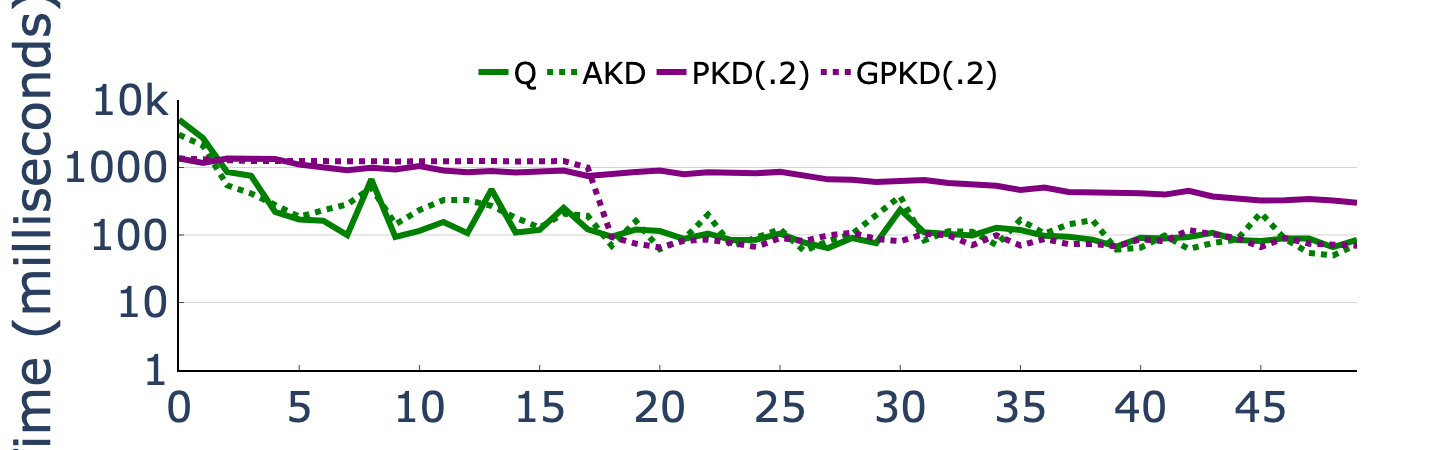

In [176]:
pq = per_query('Uniform8',[
    'Quasii',
    'CrackingKDTree',
    'ProgressiveIndex',
    'ProgressiveIndexCostModel'
], 50)
pq.update_yaxes(type="log", range=[0, 4], tickvals=[0, 1, 10, 100, 1000, 10000])
save_figure(pq, 'robustness-per-query.pdf')
pq

### Robustness

In [150]:
idx = pd.IndexSlice
a = m[['AKD', 'Q', 'PKD(.2)', 'GPKD(.2)']].loc[idx[:, 'Robustness'], :]
a = a.reset_index(level=1, drop=True)
print(pandas_to_latex(a, 'min', ignore_last=False, float_format='%.E'))
a

\begin{tabular}{lllll}
\toprule
{} &    AKD &      Q & PKD(.2) &                   GPKD(.2) \\
\midrule
Unif(8)    &  2E-01 &  6E-01 &   9E-02 &  \cellcolor{green!25}1E-03 \\
Skewed(8)  &  2E-01 &  8E-01 &   8E-02 &  \cellcolor{green!25}2E-03 \\
Zoom(8)    &  2E-01 &  7E-01 &   8E-02 &  \cellcolor{green!25}1E-03 \\
Prdc(8)    &  9E-01 &  1E+00 &   4E-02 &  \cellcolor{green!25}6E-04 \\
SeqZoom(8) &  2E-01 &  5E-01 &   1E-01 &  \cellcolor{green!25}2E-03 \\
AltZoom(8) &  9E-01 &  1E+00 &   8E-02 &  \cellcolor{green!25}6E-04 \\
Shift(8)   &  9E-01 &  2E+00 &   3E-02 &  \cellcolor{green!25}1E-03 \\
Seq (2)    &  3E-03 &  3E-01 &   1E-03 &  \cellcolor{green!25}8E-05 \\
Power      &  1E-03 &  3E-03 &   6E-04 &  \cellcolor{green!25}3E-05 \\
Genomics   &  6E-02 &  2E-01 &   1E-02 &  \cellcolor{green!25}9E-04 \\
Skyserver  &  8E-03 &  4E-02 &   4E-03 &  \cellcolor{green!25}2E-04 \\
\bottomrule
\end{tabular}



,AKD,Q,PKD(.2),GPKD(.2)
Unif(8),2E-01,6E-01,9E-02,\cellcolor{green!25}1E-03
Skewed(8),2E-01,8E-01,8E-02,\cellcolor{green!25}2E-03
Zoom(8),2E-01,7E-01,8E-02,\cellcolor{green!25}1E-03
Prdc(8),9E-01,1E+00,4E-02,\cellcolor{green!25}6E-04
SeqZoom(8),2E-01,5E-01,1E-01,\cellcolor{green!25}2E-03
AltZoom(8),9E-01,1E+00,8E-02,\cellcolor{green!25}6E-04
Shift(8),9E-01,2E+00,3E-02,\cellcolor{green!25}1E-03
Seq (2),3E-03,3E-01,1E-03,\cellcolor{green!25}8E-05
Power,1E-03,3E-03,6E-04,\cellcolor{green!25}3E-05
Genomics,6E-02,2E-01,1E-02,\cellcolor{green!25}9E-04


# Response time

In [151]:
idx = pd.IndexSlice
a = m.loc[idx[:, 'Time'], :]
a = a.reset_index(level=1, drop=True)
print(pandas_to_latex(a, 'min', ignore_last=False, float_format="%.1f"))
a

\begin{tabular}{llllllll}
\toprule
{} &   MedKD &                     AvgKD &                         Q &                        AKD & PKD(.2) & GPKD(.2) &       FS \\
\midrule
Unif(8)    &   109.7 &                     101.4 &                      95.6 &   \cellcolor{green!25}74.3 &   122.6 &    109.9 &    857.5 \\
Skewed(8)  &   147.6 &                     138.3 &                     107.6 &   \cellcolor{green!25}43.1 &   160.8 &    151.1 &    856.6 \\
Zoom(8)    &    52.0 &                      40.9 &                      11.4 &    \cellcolor{green!25}7.1 &    58.5 &     51.6 &    687.1 \\
Prdc(8)    &    85.8 &                      73.6 &  \cellcolor{green!25}61.9 &                      229.9 &    93.3 &     86.4 &    807.7 \\
SeqZoom(8) &    31.0 &                      24.2 &                       8.2 &    \cellcolor{green!25}4.5 &    46.6 &     34.1 &    499.6 \\
AltZoom(8) &    44.0 &                      34.2 &  \cellcolor{green!25}18.9 &                       22.4 &    53.4 & 

,MedKD,AvgKD,Q,AKD,PKD(.2),GPKD(.2),FS
Unif(8),109.7,101.4,95.6,\cellcolor{green!25}74.3,122.6,109.9,857.5
Skewed(8),147.6,138.3,107.6,\cellcolor{green!25}43.1,160.8,151.1,856.6
Zoom(8),52.0,40.9,11.4,\cellcolor{green!25}7.1,58.5,51.6,687.1
Prdc(8),85.8,73.6,\cellcolor{green!25}61.9,229.9,93.3,86.4,807.7
SeqZoom(8),31.0,24.2,8.2,\cellcolor{green!25}4.5,46.6,34.1,499.6
AltZoom(8),44.0,34.2,\cellcolor{green!25}18.9,22.4,53.4,48.3,747.0
Shift(8),2095.0,1319.3,1085.3,\cellcolor{green!25}775.5,1152.4,1263.6,885.5
Seq (2),15.9,8.3,\cellcolor{green!25}6.0,102.9,7.8,7.6,332.6
Power,26.0,\cellcolor{green!25}24.4,24.6,31.3,25.0,24.7,164.6
Genomics,10.9,10.9,10.6,\cellcolor{green!25}7.3,16.2,17.7,16.1


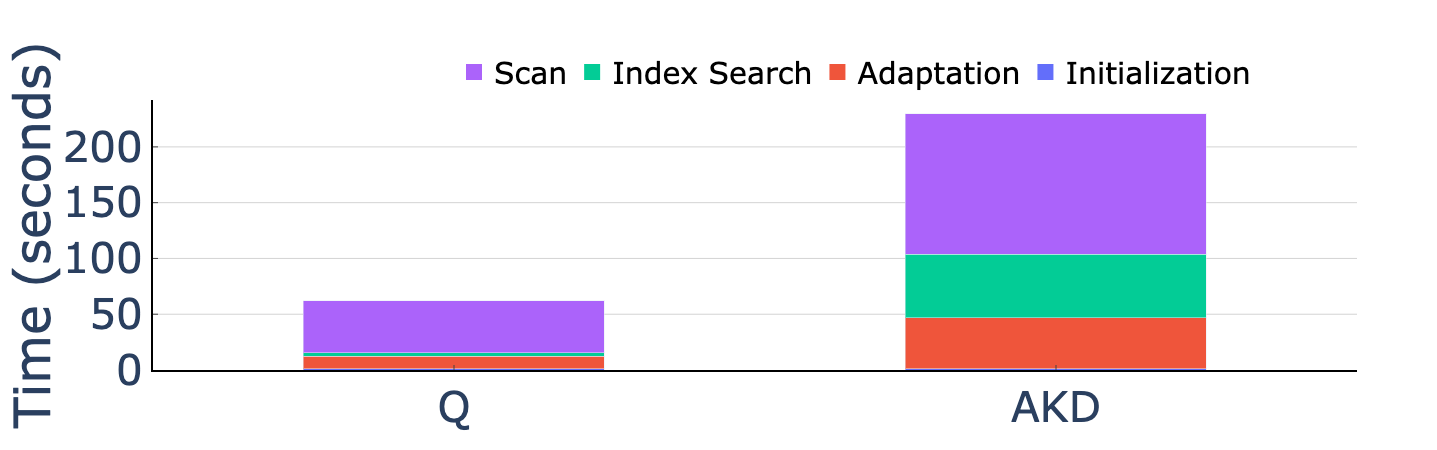

In [178]:
per = break_down('Periodic8', ['Quasii', 'CrackingKDTree'], -1)
save_figure(per, 'total_response_time_break_down.pdf')
per

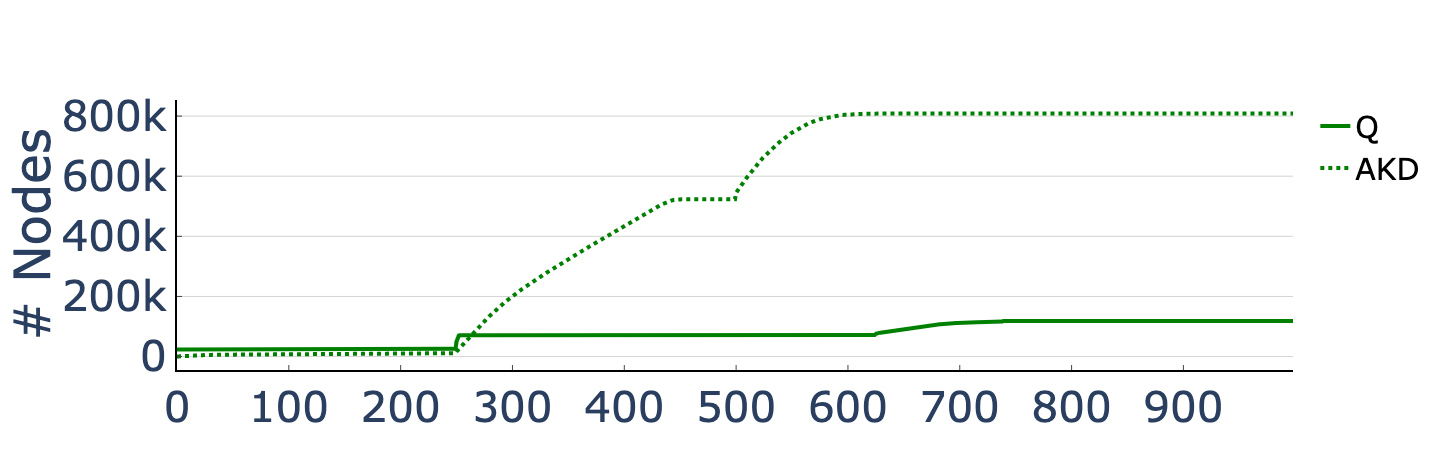

In [203]:
l = line('Periodic8', ['Quasii', 'CrackingKDTree'], 'number_of_nodes', -1)
l.update_layout(yaxis_title='# Nodes')
save_figure(l, 'total_response_time_number_of_nodes.pdf')
l

# Comparison with different number of columns

In [152]:
exps = []

for i in [2, 4, 8, 16]:
    exps.append(f'Uniform{i}')

a = metrics(exps, [
        'MedianKDTree',
        'AverageKDTree',
        'Quasii',
        'CrackingKDTree',
        'ProgressiveIndex',
        'ProgressiveIndexCostModel',
        'FullScan',
])
latex = pandas_to_latex(a, 'min', ignore_last=True)
for exp in exps:
    latex = latex.replace(experiments[exp]['name'], "\\rotatebox[origin=c]{90}{%s}" % experiments[exp]['name'])
print(latex)
a

\begin{tabular}{lllllllll}
\toprule
         &      &    MedKD &    AvgKD &                          Q &                         AKD &                   PKD(.2) &                   GPKD(.2) &       FS \\
\midrule
\multirow{5}{*}{\rotatebox[origin=c]{90}{Unif(2)}} & First Query &    15.94 &     8.35 &                       2.89 &                        1.05 &                      0.55 &   \cellcolor{green!25}0.54 &     0.52 \\
         & PayOff &    16.05 &     8.40 &                       5.56 &    \cellcolor{green!25}1.63 &                      1.94 &                       8.18 &        - \\
         & Convergence &        - &        - &                          * &                           * &                      9.68 &   \cellcolor{green!25}7.78 &        - \\
         & Robustness &        - &        - &                       0.20 &                        0.02 &                      0.01 &   \cellcolor{green!25}0.00 &        - \\
         & Time &    19.08 &    11.49 &            

MedKD    AvgKD                          Q  \
Unif(2)  First Query    15.94     8.35                       2.89   
         PayOff         16.05     8.40                       5.56   
         Convergence        -        -                          *   
         Robustness         -        -                       0.20   
         Time           19.08    11.49                      10.76   
Unif(4)  First Query    17.13     9.56                       3.14   
         PayOff         17.33     9.66                       5.80   
         Convergence        -        -                          *   
         Robustness         -        -                       0.20   
         Time           25.27    17.72  \cellcolor{green!25}17.13   
Unif(8)  First Query    20.20    12.46                       5.11   
         PayOff         22.19    13.57                      11.12   
         Convergence        -        -                          *   
         Robustness         -        -                       0.60   
         Time          109.69   101.41                      95.59   
Unif(16) First Query    45.10    36.99                      29.19   
         PayOff        223.96   173.06                      50.65   
         Convergence        -        -                          *   
         Robustness         -        -                      20.00   
         Time         1054.69  1023.24                     461.45   

                                             AKD                   PKD(.2)  \
Unif(2)  First Query                        1.05                      0.55   
         PayOff         \cellcolor{green!25}1.63                      1.94   
         Convergence                           *                      9.68   
         Robustness                         0.02                      0.01   
         Time           \cellcolor{green!25}9.34                     12.75   
Unif(4)  First Query                        1.65                      0.83   
         PayOff         \cellcolor{green!25}3.26                      4.65   
         Convergence                           *                     14.47   
         Robustness                         0.08                      0.03   
         Time                              18.32                     22.32   
Unif(8)  First Query                        3.07  \cellcolor{green!25}1.36   
         PayOff         \cellcolor{green!25}6.83                     31.41   
         Convergence                           *                     38.02   
         Robustness                         0.20                      0.09   
         Time          \cellcolor{green!25}74.27                    122.60   
Unif(16) First Query                       10.85                      2.07   
         PayOff        \cellcolor{green!25}35.64                    183.21   
         Convergence                           *                     96.14   
         Robustness                         3.00  \cellcolor{green!25}0.03   
         Time         \cellcolor{green!25}260.02                   1026.44   

                                       GPKD(.2)       FS  
Unif(2)  First Query   \cellcolor{green!25}0.54     0.52  
         PayOff                            8.18        -  
         Convergence   \cellcolor{green!25}7.78        -  
         Robustness    \cellcolor{green!25}0.00        -  
         Time                             11.24   425.34  
Unif(4)  First Query   \cellcolor{green!25}0.82     0.65  
         PayOff                           11.40        -  
         Convergence  \cellcolor{green!25}10.66        -  
         Robustness    \cellcolor{green!25}0.00        -  
         Time                             19.39   614.59  
Unif(8)  First Query   \cellcolor{green!25}1.36     0.91  
         PayOff                           22.88        -  
         Convergence  \cellcolor{green!25}21.34        -  
         Robustness    \cellcolor{green!25}0.00        -  
         Time                            109.90   